<a href="https://colab.research.google.com/github/serpentile-c137/AIDL/blob/master/customerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


This is unbalanced data

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
X = df.drop('Exited',axis=1)
y = df['Exited'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8632 - loss: 0.3205 - val_accuracy: 0.8612 - val_loss: 0.3538
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8601 - loss: 0.3267 - val_accuracy: 0.8600 - val_loss: 0.3539
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8600 - loss: 0.3288 - val_accuracy: 0.8606 - val_loss: 0.3538
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.3255 - val_accuracy: 0.8619 - val_loss: 0.3535
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3296 - val_accuracy: 0.8606 - val_loss: 0.3539
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8667 - loss: 0.3237 - val_accuracy: 0.8644 - val_loss: 0.3532
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8581 - loss: 0.3232 - val_accuracy: 0.8594 - val_loss: 0.3543
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8678 - loss: 0.3211 - val_accuracy: 0.

In [ ]:
model.layers[0].get_weights()   # 33 layers (weigth) , 3 bias

[array([[-0.04501217, -0.25127697, -0.04107631, -0.369073  ,  0.03696722,
         -0.21481001, -0.05826709, -0.05700071,  0.18459   ,  0.06472208,
         -0.09857412],
        [-0.6431505 ,  0.48478213, -0.8223558 ,  0.3582821 ,  0.1951202 ,
          1.0743457 ,  0.13801564,  0.06271411,  0.33610123,  0.06785415,
          0.24578919],
        [ 0.10889242, -0.21356316,  0.16192439, -0.38956308, -0.07404024,
          0.08636534,  0.24501368,  0.16253066,  0.35291743,  0.34317693,
         -0.09420414],
        [-0.06186161, -0.21599163,  0.102273  , -0.17932154,  0.5200424 ,
          0.08943637, -0.6735444 , -0.40942204, -0.4915115 ,  0.7340952 ,
          0.03784432],
        [-0.12239601, -0.14004005,  0.02094134,  0.3465579 ,  0.79136556,
          0.6443584 ,  1.1494005 , -1.0622267 , -0.17368838,  0.5652836 ,
         -0.84455055],
        [-0.00871773,  0.57882804,  0.15625693, -0.0763797 ,  0.03551154,
         -0.02244424,  0.22042015, -0.04156696, -0.067874  , -0.0580395

In [ ]:
model.layers[1].get_weights()

[array([[-0.080531  , -0.79238313,  0.82923746, -0.54610646, -0.821005  ,
          0.03726244, -0.54253036, -0.00266598, -0.0596356 ,  0.4110225 ,
          0.46065772],
        [-0.0518294 ,  0.45083982,  0.4143339 , -0.28478947, -0.62514234,
          0.4400933 , -0.08204488,  0.15233114,  0.05459066, -0.26416573,
          0.04443424],
        [ 0.18091883, -0.38095117, -0.71068025, -0.47190398, -0.20971635,
          0.44495   ,  0.32175687,  0.0200189 , -0.06878851,  0.23301709,
         -0.6168233 ],
        [ 0.2637227 ,  0.43513107,  0.02692709,  0.03557485,  0.38514167,
          0.3098194 , -0.68407726, -0.02081411,  0.05523335, -0.37223092,
          0.31339103],
        [ 0.22405346,  0.71917766,  0.36227393,  0.71861887,  0.34360936,
          0.29466668,  0.68467027, -0.52720916, -0.6151821 , -0.64742637,
          0.28803602],
        [-0.625167  , -0.23042642, -0.03927911, -0.40888175,  0.11859899,
          0.08242133, -0.19866468, -1.0453742 , -0.1670304 ,  0.7745042

In [ ]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_log

array([[0.23340963],
       [0.27777323],
       [0.07782665],
       ...,
       [0.07176704],
       [0.17081162],
       [0.23893094]], dtype=float32)

In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8585

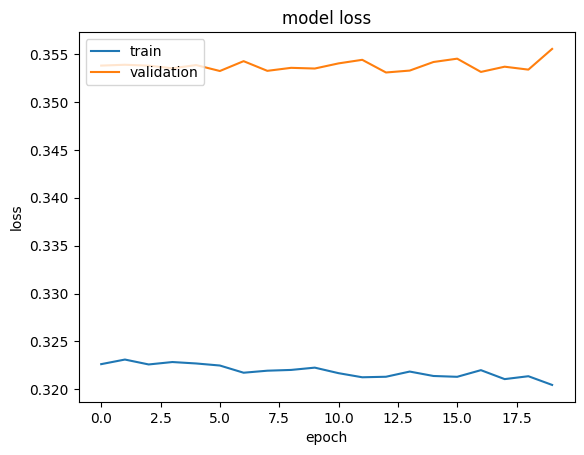

In [ ]:
import matplotlib.pyplot as plt

# loss and val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

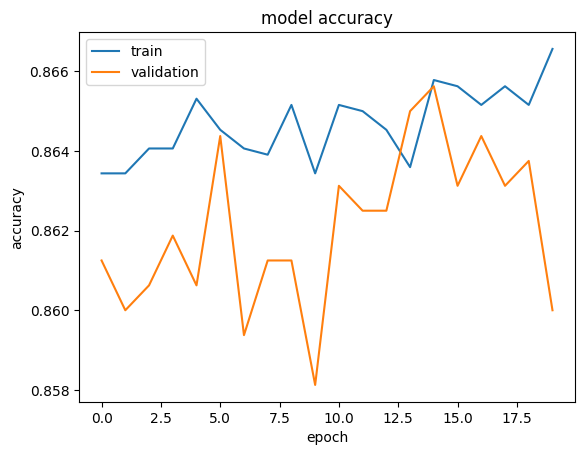

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')